<h2> Анализ базы данных сервиса для чтения книг по подписке</h2> <br>
<h3>Цель </h3>  анализ базы данных сервиса<br>
<h3>Задачи </h3> 
- посчитать, сколько книг вышло после 1 января 2000 года <br>
- для каждой книги посчитать количество обзоров и среднюю оценку<br>
- определить издательство, которое выпустило наибольшее число книг толще 50 страниц <br>
- определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками<br>
- посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок <br>

<h3>Используемые таблицы:</h3> 
Таблица books содержит следующие данные о книгах: уник идентификатор, уник идентификатор автора, название, колич страниц, дата публикации, уник идентифик издателя<br>
Таблица authors содержит уник идентиф автора, имя автора<br>
Таблица publishers содержит идентифик издательства, название издательства<br>
Таблица ratings содержит идентификатор оценки, идентификатор книги, имя пользователя, оставившего оценку, оценка книги<br><br>
Таблица reviews содержит идентификатор обзора, идентификатор книги, имя пользователя, написавшего обзор, текст обзора<br>

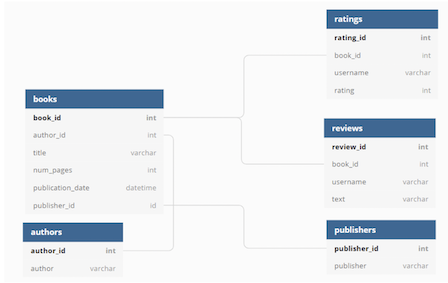

In [1]:
import pandas as pd
from sqlalchemy import create_engine 

In [2]:
db_config = {'user': 'praktikum_student', 
 'pwd': 'Sdf4$2;d-d30pp',
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, 
 'db': 'data-analyst-final-project-db'}

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db']) 

engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [27]:
datas = ['books', 'authors', 'publishers', 'ratings', 'reviews']

for data in datas:
    query_data = \
            f'''SELECT *
            FROM {data}'''
    
    data_ = pd.io.sql.read_sql(query_data, con=engine)
    display(data_.head())
    display(data_.info())
    if data == 'books':
        print(f"Уникальных названий  книг: {data_['title'].nunique()}")
        print(f"Уникальных книг: {data_['book_id'].nunique()}")
        print(f"Количество книг, меньше 50 стр: {len(data_[data_['num_pages'] < 50])}")
    if data == 'authors':
        print(f"Уникальных авторов: {data_['author_id'].nunique()}")  
    if data == 'publishers':
        print(f"Уникальных издательств: {data_['publisher_id'].nunique()}")  
    if data == 'ratings':
        print(f"Уникальных пользователей, которые дали оценку: {data_['username'].nunique()}")
        print(f"Уникальных рейтингов: {data_['rating_id'].nunique()}")
    if data == 'reviews':
        print(f"Уникальных пользователей, которые написали обзор: {data_['username'].nunique()}")
        print(f"Уникальных обзоров: {data_['review_id'].nunique()}")
    print('*********************************************')

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

Уникальных названий  книг: 999
Уникальных книг: 1000
Количество книг, меньше 50 стр: 8
*********************************************


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

Уникальных авторов: 636
*********************************************


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

Уникальных издательств: 340
*********************************************


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

Уникальных пользователей, которые дали оценку: 160
Уникальных рейтингов: 6456
*********************************************


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

Уникальных пользователей, которые написали обзор: 160
Уникальных обзоров: 2793
*********************************************


В таблице books содержится 1000 уникальных книг, в таблице authors - 636 авторов, в таблице  publishers - 340 издательств. На 1 автора, в среднем, приходится 1,6 книги - значит, есть авторы, которые написали более одного произведения. На 1 издательство приходится 2.9 книги. В среднем, на одну книгу приходится 6.5 оценки, один пользователь оставил 40.35 оценок, на одну книгу приходится 2.8 обзора, один пользователь оставил 17,5 обзоров. В books есть 8 книг, меньше 50 страниц.

<h4>сколько книг вышло после 1 января 2000 года?

In [7]:
query_books = \
        ''' SELECT 
                COUNT(DISTINCT book_id) 
            FROM 
                books
            WHERE
                publication_date > '2000-01-01'
        '''

In [8]:
books = pd.io.sql.read_sql(query_books, con = engine) 

In [9]:
books 

,count
0,819


<h4>количество обзоров и среднюю оценку каждой книги

In [21]:
query_rating = \
        '''
        SELECT
            Sub.book_id AS book_id,
            AVG(Sub.book_rating) AS avg_book_rating,
            COUNT(DISTINCT Sub.rating_id) AS count_rating,
            COUNT(DISTINCT Sub.review_id) AS count_review
        FROM (
        
                SELECT
                    books.book_id AS book_id,
                    books.title AS book_title,
                    ratings.rating AS book_rating,
                    ratings.rating_id AS rating_id,
                    reviews.review_id AS review_id
                FROM
                    books
                    INNER JOIN ratings ON ratings.book_id = books.book_id
                    INNER JOIN reviews ON reviews.book_id = books.book_id) AS Sub
        GROUP BY
            book_id
        ORDER BY
            avg_book_rating DESC
        '''

In [22]:
books_rating = pd.io.sql.read_sql(query_rating, con = engine) 

In [25]:
books_rating.describe()

,book_id,avg_book_rating,count_rating,count_review
count,994.000000,994.000000,994.000000,994.000000
mean,501.144869,3.898699,6.481891,2.809859
std,288.845619,0.562190,11.777997,1.055873
min,1.000000,1.500000,2.000000,1.000000
25%,252.250000,3.500000,2.000000,2.000000
50%,501.500000,4.000000,3.000000,3.000000
75%,750.750000,4.333333,5.000000,3.000000
max,1000.000000,5.000000,160.000000,7.000000


Более 50% из 994 книг имеют рейтинг от 4.0, 3 отзыва и минимум 3 оценки, 6 книг остались без отзывов и оценок.

<h4>Определите издательство, которое выпустило наибольшее число книг толще 50 страниц

In [10]:
query_publishers = \
    '''
    SELECT
        Sub.publisher AS publisher,
        COUNT(DISTINCT Sub.book_id) AS count_book
    FROM( 
        SELECT 
            books.book_id AS book_id,
            books.title AS book_title,
            books.num_pages AS num_pages,
            publishers.publisher AS publisher 
        FROM
            books
            INNER JOIN publishers ON publishers.publisher_id = books.publisher_id
        WHERE
            num_pages > 50) AS Sub
    GROUP BY
        publisher
    ORDER BY
        count_book DESC
    LIMIT 1
    '''

In [11]:
query_publishers = pd.io.sql.read_sql(query_publishers, con = engine) 

In [12]:
query_publishers

,publisher,count_book
0,Penguin Books,42


Penguin Books выпустило больше всех книг

<h4>Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [13]:
query_autor = \
    '''
    SELECT
        COUNT(DISTINCT Sub.title) AS n_books,
        Sub.author AS author,
        AVG(Sub.rating_book) AS avg_rating_book
    FROM (
        SELECT
            books.title AS title,
            COUNT(DISTINCT ratings.rating_id) AS rating_id, 
            AVG(ratings.rating) AS rating_book,
            authors.author AS author
        FROM
            books
            INNER JOIN authors ON authors.author_id = books.author_id
            INNER JOIN ratings ON ratings.book_id = books.book_id
        GROUP BY
            title,
            author) AS Sub
    WHERE
        Sub.rating_id  >= 50
    GROUP BY
        author
    ORDER BY
        avg_rating_book DESC
    LIMIT 15
    '''

In [14]:
query_autor = pd.io.sql.read_sql(query_autor, con = engine) 

Джоан Роулинг оказалась автором с самой высокой оценкой книг, также ее 4 книги вошли в топ самых цениваемых книг - более 70 оценок на каждую книгу

<h4>Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [15]:
query_username = \
    '''
       SELECT
            AVG(Sub.rev_count) 
        FROM (
            SELECT
                username AS username,
                COUNT(review_id) AS rev_count
            FROM
                reviews
            WHERE
                username IN ( 
                SELECT
                    username
                FROM
                    ratings
                GROUP BY
                    username
                HAVING
                    COUNT(rating_id) > 50)
            GROUP BY
                username) AS Sub
    
    '''

In [16]:
query_username = pd.io.sql.read_sql(query_username, con=engine)

In [17]:
query_username

,avg
0,24.333333


Активные на выставление рейтингов пользователи активно пишут ревью - в среднем, 24 ревью на человека

<h3>Выводы </h3> 
- после 1 января 2000 года вышло 819 книг<br>
- более 50% из 994 книг имеют рейтинг от 4.0, минимум 3 отзыва и минимум 3 оценки<br>
- издательство Penguin Books выпустило наибольшее число книг толще 50 страниц <br>
- Джоан Роулинг оказалась автором с самой высокой оценкой книг, также ее 4 книги вошли в топ самых цениваемых книг - более 70 оценок на каждую книгу<br>
- активные на выставление рейтингов пользователи активно пишут ревью - в среднем, 24 ревью на человека <br>